In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load the data
- Use the function defined in last week's notebook to load the MovieLens-small dataset.
- Use `pd.read_csv()` to load `ratings.csv`
- Show basic information of the dataset:
    - Shape
    - Feature names
    - Feature data types
    - First 5 rows
    - Statistics of numerical features (Use .describe())
    - Frequencies of categorical features (Use .value_counts())
    - Any missing values? (Use pd.isnull())

In [5]:
import urllib.request
import zipfile

def get_movielens(file_path, file_name, delete_zip_file=False):
    url = "http://files.grouplens.org/datasets/movielens/" + file_name
    if not os.path.exists(file_path + file_name):
        urllib.request.urlretrieve(url, file_path + file_name)
        print("File", file_name, "downloaded.")
    with zipfile.ZipFile(file_path + file_name, "r") as f:
        f.extractall(file_path)
        print("Files extracted:")
        print(f.printdir())
    if delete_zip_file:
        os.remove(file_path + file_name)

In [6]:
file_path = "Data/"
zip_file = "ml-latest-small.zip"
get_movielens(file_path, zip_file)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/ml-latest-small.zip'

In [7]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv", delimiter=",")
ratings_df.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [8]:
# Print the shape of the data frame
ratings_df.shape

(100836, 4)

In [9]:
# Print the feature names
ratings_df.columns


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [10]:
# Print the data types of features
ratings_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [11]:
# Add a "Year" column that represents the year of the rating (Convert datastamp to datetime)
from datetime import datetime
ratings_df['DT'] = ratings_df['timestamp'].apply(datetime.fromtimestamp)
def datetime_to_year(x):
    return x.year
ratings_df['Year'] = ratings_df['DT'].apply(datetime_to_year)

In [12]:
# Use .describe() to show the statistics of numerical features
ratings_df.describe()

,userId,movieId,rating,timestamp,Year
count,100836.000000,100836.000000,100836.000000,1.008360e+05,100836.000000
mean,326.127564,19435.295718,3.501557,1.205946e+09,2007.722619
std,182.618491,35530.987199,1.042529,2.162610e+08,6.890284
min,1.000000,1.000000,0.500000,8.281246e+08,1996.000000
25%,177.000000,1199.000000,3.000000,1.019124e+09,2002.000000
50%,325.000000,2991.000000,3.500000,1.186087e+09,2007.000000
75%,477.000000,8122.000000,4.000000,1.435994e+09,2015.000000
max,610.000000,193609.000000,5.000000,1.537799e+09,2018.000000


In [13]:
# Use .value_counts() to show the frequencies of ratings and years
rating_counts = ratings_df["rating"].value_counts()
year_counts = ratings_df["Year"].value_counts()

rating_counts = rating_counts.sort_index()
year_counts = year_counts.sort_index()

print(rating_counts)
print(year_counts)

0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64
1996     6040
1997     1916
1998      507
1999     2439
2000    10061
2001     3922
2002     3478
2003     4014
2004     3279
2005     5813
2006     4062
2007     7111
2008     4375
2009     4134
2010     2301
2011     1690
2012     4656
2013     1664
2014     1439
2015     6616
2016     6703
2017     8203
2018     6413
Name: Year, dtype: int64


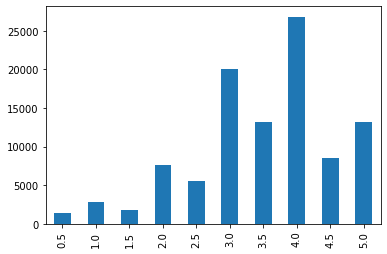

In [14]:
rating_counts.plot.bar()


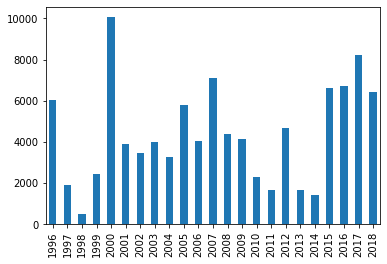

In [15]:
year_counts.plot.bar()

In [16]:
# Use pd.isnull() to find the number of missing values for each column
# for column in columns:
np.sum(ratings_df.isnull(), axis = 0)


userId       0
movieId      0
rating       0
timestamp    0
DT           0
Year         0
dtype: int64

## 2. Analyzing the rating data

We will continue the data analysis from last week.

### A. The distribution of the ratings
- Show the frequency of each rating (0.5 - 5.0)
- Show the rating frequencies in 2018 (First create a sub DataFrame containing only 2018 ratings)
- Show the rating frequencies in 2003
- Compare ratings distributions in 2003 and 2018.

Overall rating frequencies:
 4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


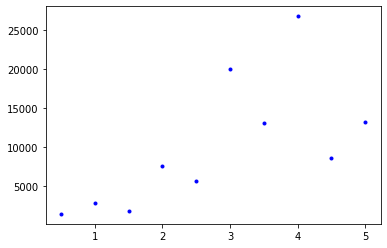

In [17]:
# Use value_counts() to find the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts()
print("Overall rating frequencies:\n", rating_frequencies)
# print("Overall rating frequencies:\n", rating_frequencies.sort_index())
plt.plot(rating_frequencies.index,
         rating_frequencies.values,
         'b.')
# plt.bar(rating_frequencies.index,
#         rating_frequencies.values,
#         )

In [18]:
# Find the slice that correspond to 2018 ratings
index_2018 = (ratings_df['Year'] == 2018)
# print(index_2018)

# Extract all 2018 ratings
ratings_2018 = ratings_df[index_2018]
ratings_2018.head()
print("Shape of the sub data frame:", ratings_2018.shape)
rating_freq_2018 = ratings_2018['rating'].value_counts()
print(rating_freq_2018)

Shape of the sub data frame: (6413, 6)
4.0    1345
3.5     971
3.0     857
4.5     770
5.0     763
2.5     556
2.0     521
1.5     268
0.5     182
1.0     180
Name: rating, dtype: int64


Text(0, 0.5, 'Relative Frequency')

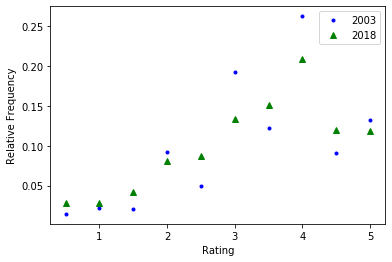

In [19]:
# What are the rating frequencies in 2003?
rating_freq_2003 = ratings_df[ratings_df['Year'] == 2003]['rating'].value_counts()

# Plot frequency comparison
plt.plot(rating_freq_2003 / np.sum(rating_freq_2003), 'b.', label="2003")
plt.plot(rating_freq_2018 / np.sum(rating_freq_2018), 'g^', label="2018")
plt.legend()
plt.xlabel("Rating")
plt.ylabel("Relative Frequency")

**Conclusion:** The ratings distribution in 2003 is quite similar to the distribution in 2018. Most ratings are between 3.0 and 4.0.

### B. How consistant are the average ratings over time?
- Find a list of years during which ratings are given.
- For each year, extract the ratings given in that year, and then calculate the average rating
- Plot the average rating against the year number.

In [20]:
# Get the list of all years in the dataset
# set(ratings_df['Year'])
years = np.sort(ratings_df['Year'].unique())
print(years)

[1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [21]:
# Calculate the average rating for each year
all_avg_ratings = []
for year in years:
    index_year = (ratings_df['Year'] == year)
    ratings_year = ratings_df[index_year]
    avg_rating = np.mean(ratings_year['rating'])
    all_avg_ratings.append(avg_rating)
print(all_avg_ratings)

[3.5359271523178806, 3.7275574112734864, 3.4358974358974357, 3.772447724477245, 3.39250571513766, 3.5122386537480876, 3.606958021851639, 3.4993771798704536, 3.506099420555047, 3.4315327713745054, 3.488060068931561, 3.3088876388693573, 3.6589714285714288, 3.3886066763425253, 3.4634941329856583, 3.7840236686390534, 3.6413230240549828, 3.8774038461538463, 3.5107713690062545, 3.513830108827086, 3.686334477099806, 3.3487748384737293, 3.3891314517386557]


(0, 5)

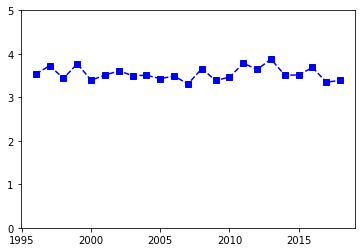

In [22]:
# Plot
plt.plot(years, all_avg_ratings, 'bs--')
plt.ylim([0, 5])

**Conclusion:** No significant rating inflations

### C. How fast does the movie library grow?
- For each year, extract all ratings given **in that year or before**.
- Find the number of unique movies in the subset.
- Plot the number of movies against the year number

Text(0, 0.5, 'Number of Movies')

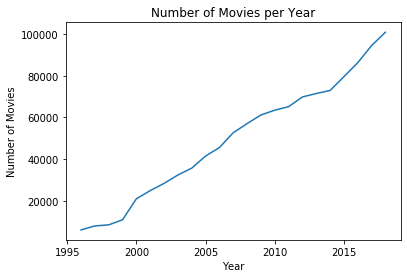

In [23]:
years = set(ratings_df["Year"])
movie_counts = []

for year in years:
    year_filter = ratings_df["Year"] <= year
    year_df = ratings_df[year_filter]
    
    movie_counts.append(len(year_df))
    
movie_counts = pd.Series(movie_counts)
years = list(years)
years = pd.Series(years)

plt.plot(years,movie_counts)
plt.title("Number of Movies per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")

**Discussion:** How does the number of movies vary?

__Over time the number of movies in the library grows steadily__

### D. How fast does the user base grow?
- For each year, extract all ratings given in that year or before.
- Find the number of unique users in the subset.
- Plot the number of users against the year number.

Text(0, 0.5, 'Number of Users')

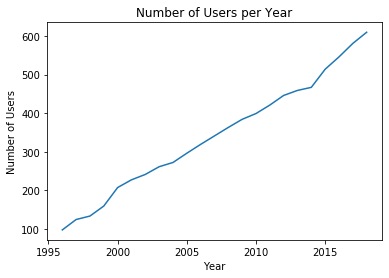

In [24]:
user_counts = []

for year in years:
    year_filter = ratings_df["Year"] <= year
    year_df = ratings_df[year_filter]
    
    user_counts.append(len(set(year_df["userId"])))

plt.plot(years, user_counts)
plt.title("Number of Users per Year")
plt.xlabel("Year")
plt.ylabel("Number of Users")



**Discussion:** How does the user base grow?

__Over time the number of users grows steadily__

### E. Time of ratings

In [25]:
# When was the first rating given?
ratings_df['DT'].min()

Timestamp('1996-03-29 14:36:55')

In [26]:
# When was the last rating given?
ratings_df['DT'].max()

Timestamp('2018-09-24 10:27:30')

(0, 24)

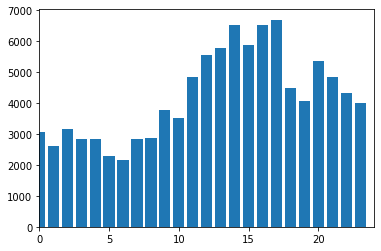

In [27]:
# During what time of day do most users give ratings?

ratings_df['Hour'] = ratings_df['DT'].dt.hour
hour_freq = ratings_df['Hour'].value_counts().sort_index()
plt.bar(hour_freq.index, hour_freq.values)
plt.xlim(0, 24)

**Conclusion:** __Users give the most ratings between 2:00 PM to 6:00 PM.__

### F. Popular Movies

In [28]:
# Which movie received the highest number of ratings?

movie_counts = ratings_df["movieId"].value_counts()

max_ = movie_counts == movie_counts.max()
movie_counts[max_]

# The movie with the ID Number of 356 received the highest number of ratings

356    329
Name: movieId, dtype: int64

In [29]:
# Load the movies.csv file as a second data frame movies_df

movies_df = pd.read_csv("movies.csv",
                       delimiter = ",")
movies_df.head()

# Find the name of the movie with highest number of ratings.
max_filter = movies_df["movieId"] == movie_counts.max()
movies_df[max_filter]

# Star Trek: Generations is the movie with the highest number of ratings

,movieId,title,genres
287,329,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi


In [31]:
# Which movie received the largest amount of 5.0?

perfect_score_filter = ratings_df["rating"] == 5 
perfect_ratings = ratings_df[perfect_score_filter]

perfect_counts = perfect_ratings["movieId"].value_counts()

perfect_max_filter = perfect_counts == perfect_counts.max()
print(perfect_counts[perfect_max_filter])

# Movie ID 318

318    153
Name: movieId, dtype: int64


In [32]:
# Find the name of the movie

perfect_max_filter2 = movies_df["movieId"] == 318
movies_df[perfect_max_filter2]

# The name of the movie with the most perfect ratings is Shawshank Redemption

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


In [33]:
# Which five movie has the highest average rating?

average_ratings = []

movieIds = list(set(ratings_df["movieId"]))

for movieId in movieIds:
    
    movie_filter = ratings_df["movieId"] == movieId
    movie_df = ratings_df[movie_filter]
    
    average_ratings.append(movie_df["rating"].mean())

average_ratings = list(average_ratings)

average_ratings_df = pd.DataFrame({"movieId": movieIds, "average_rating": average_ratings})

average_ratings_df.sort_values(by = "average_rating", ascending = False, inplace = True)
average_ratings_df.head()

,movieId,average_rating
3649,69860,5.0
5588,7096,5.0
7143,79897,5.0
8884,27320,5.0
8885,158398,5.0


In [60]:
# Find the name of the movies
movies_df = pd.read_csv("movies.csv",
                       delimiter = ",")

movie_ids = average_ratings_df.head()["movieId"]
print(movie_indexes)

movies_df[movies_df['movieId'].isin(movie_ids)]


Int64Index([3649, 5588, 7143, 8884, 8885], dtype='int64')


,movieId,title,genres
4768,7096,Rivers and Tides (2001),Documentary
5633,27320,"Nine Lives of Tomas Katz, The (2000)",Comedy|Drama|Fantasy
7080,69860,Eichmann (2007),Drama|War
7400,79897,Get Low (2009),Comedy|Drama|Mystery
9289,158398,World of Glory (1991),Comedy


In [63]:
# How many ratings do these movies receive?




(100836, 7)

## 3. Working with multiple data frames

In [71]:
movies_df = pd.read_csv("movies.csv", delimiter=",")
movies_df.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [73]:
# Create a "AvgRating" column: for each movie, fill in its average rating
movieIds = movies_df.loc[:,"movieId"]
avgRatings = []

for movieId in movieIds:
        movie_filter = ratings_df["movieId"] == movieId
        mean_rating = ratings_df[movie_filter]["rating"].mean()
        avgRatings.append(mean_rating)
        
movies_df["avgRating"] = avgRatings

In [74]:
movies_df.head()

,movieId,title,genres,avgRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [110]:
# Create a "NumRatings" column: for each movie, fill in the number ratings
num_movies = ratings_df["movieId"].value_counts().sort_index()
num_movies = list(num_movies)

zeros = np.zeros(len(movies_df) - len(num_movies))

for zero in zeros:
    num_movies.append(zero)
    

movies_df["numRatings"] = num_movies 

movies_df.head()

,movieId,title,genres,avgRating,numRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [112]:
# Extract movies with ratings >= 100
hundred_filter = movies_df["numRatings"] >= 100
movies_df2 = movies_df[hundred_filter]

movies_df2.head()


,movieId,title,genres,avgRating,numRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132.0
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3.983051,177.0


In [114]:
# Use .sort_values() to sort the data frame according to the AvgRating column
movies_df2 = movies_df2.sort_values(by = "avgRating", ascending = False)
movies_df2.head()

,movieId,title,genres,avgRating,numRatings
3189,4298,Rififi (Du rififi chez les hommes) (1955),Crime|Film-Noir|Thriller,4.750000,170.0
4421,6533,"What's Up, Doc? (1972)",Comedy,4.500000,149.0
895,1192,Paris Is Burning (1990),Documentary,4.500000,133.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
910,1209,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western,4.305556,196.0


In [68]:
# Extract the comedy movies


,movieId,title,genres,AvgRating,NumRatings
899,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,4.232394,142.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
3622,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,4.183333,120.0
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
863,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,4.161765,136.0


In [ ]:
# Find the 5 top-rated comedies


In [80]:
# Load tags.csv


In [81]:
# For Movie #1: Toy Story, find all tags related to it.


In [82]:
# Create a string that contains all the tags for Toy Story, separated by '|'


In [ ]:
# Create a "Tags" column in the movies dataframe, fill in the string that contains 
# each movie's tags

